In [2]:
pip install imblearn


     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa 3.3.3 requires packaging<21.0,>=20.0, but you have packaging 23.0 which is incompatible.
rasa 3.3.3 requires prompt-toolkit<3.0.29,>=3.0, but you have prompt-toolkit 3.0.36 which is incompatible.


In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Data Reading
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Value Counts
for col in df:
  print(col) 
  print(df[col].value_counts())

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92  

In [9]:
# dropping irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


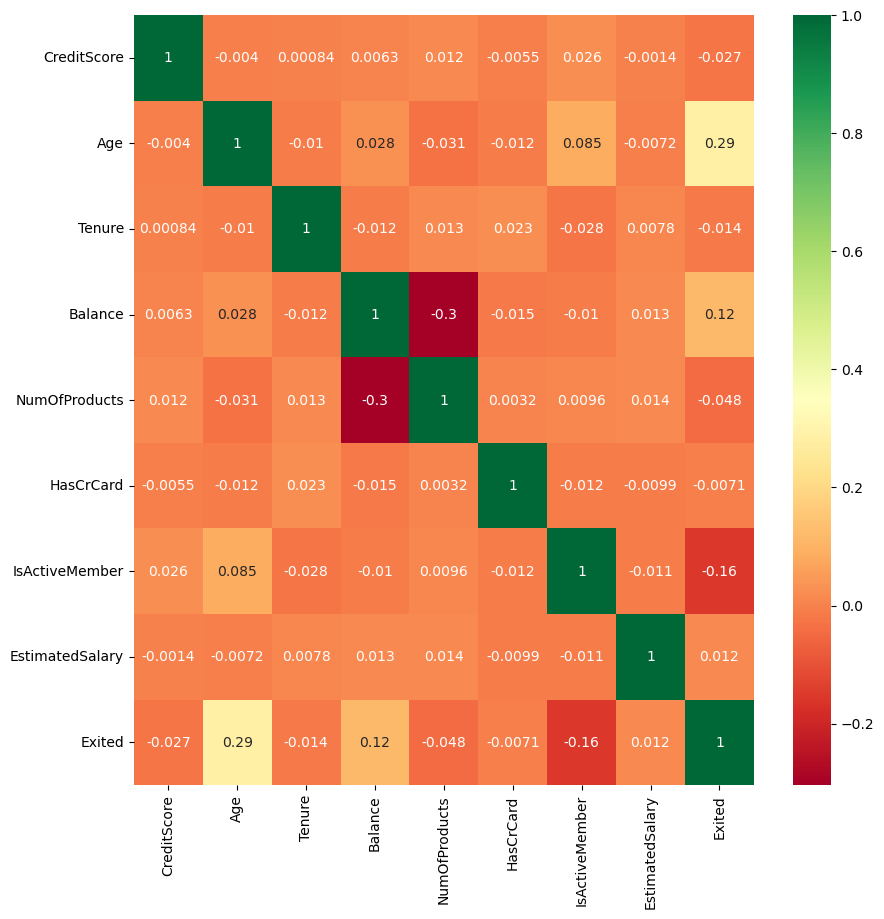

In [10]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)
plt.show()

In [11]:
# data split
df_cat = df.select_dtypes("object")
df_num = df.select_dtypes(["int64","float64"])

In [12]:
df_cat.head(5)

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


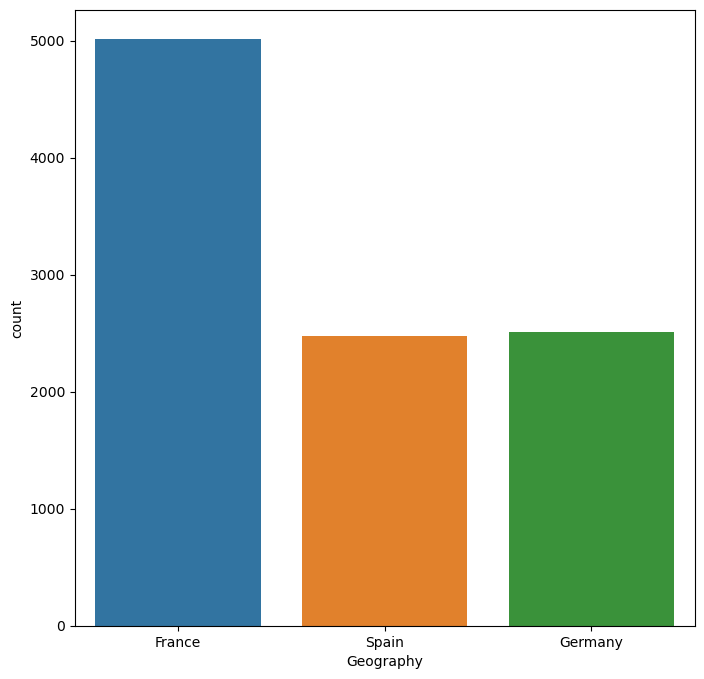

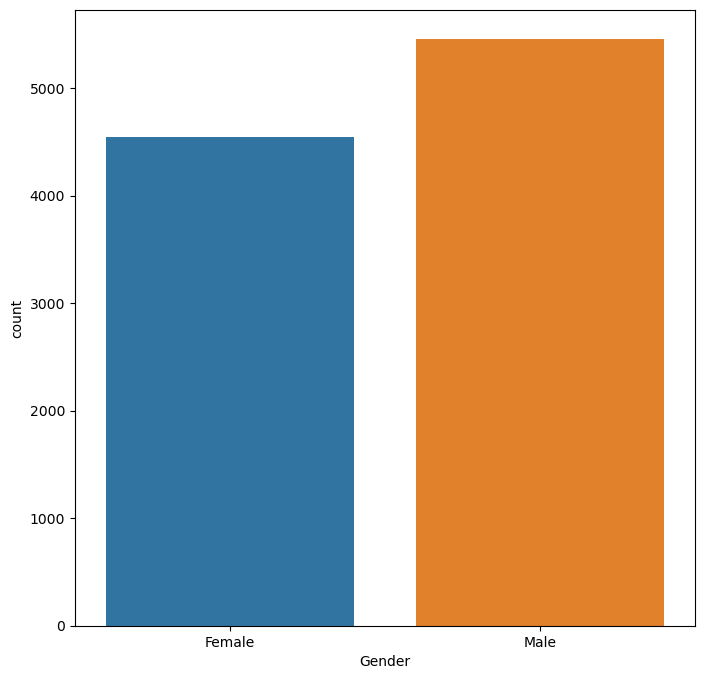

In [13]:
# data visualization
for col in df_cat: 
  plt.figure(figsize=(8, 8)) 
  sns.countplot(x=col, data= df_cat)
  plt.xlabel(col)

In [14]:
# Label encoding
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [15]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


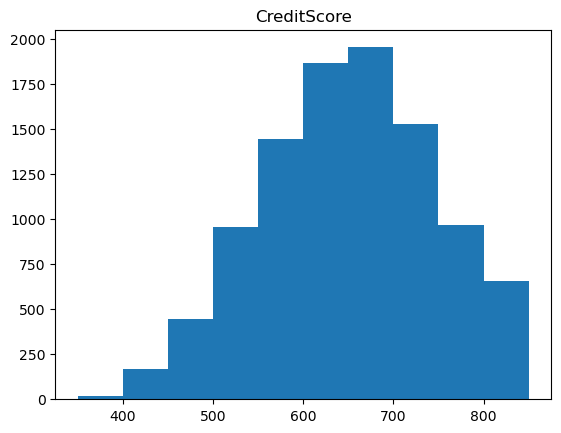

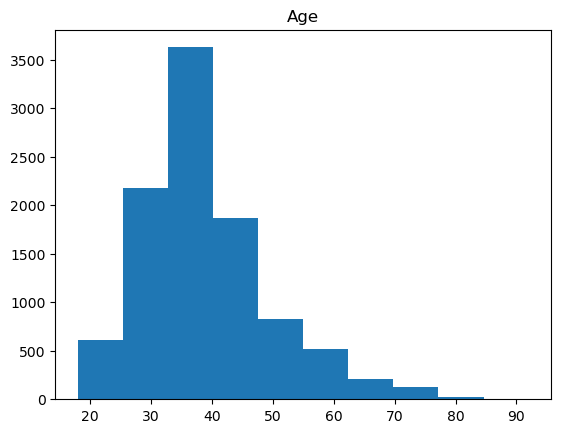

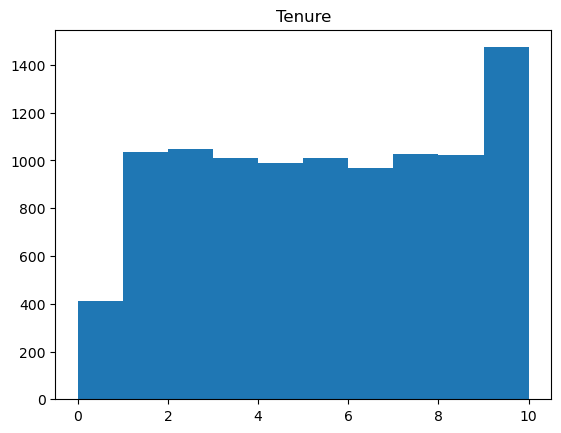

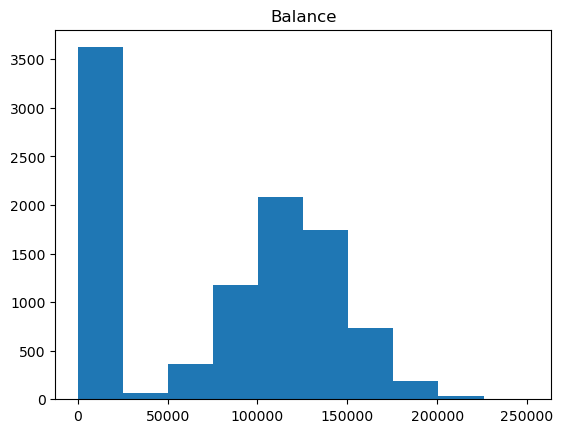

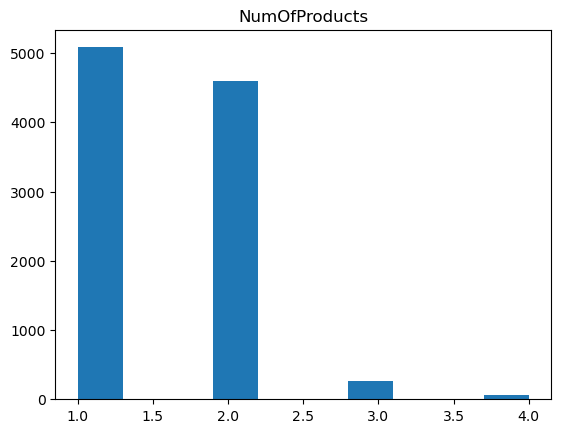

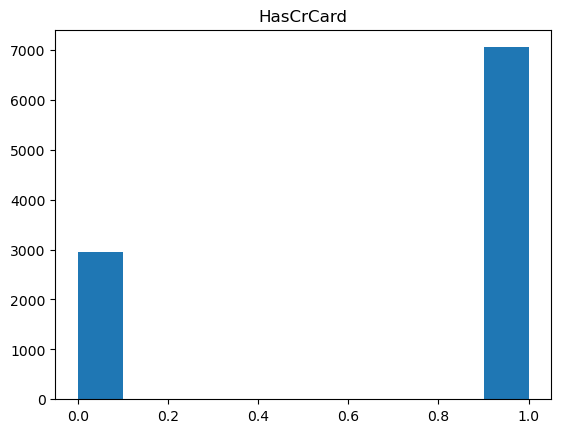

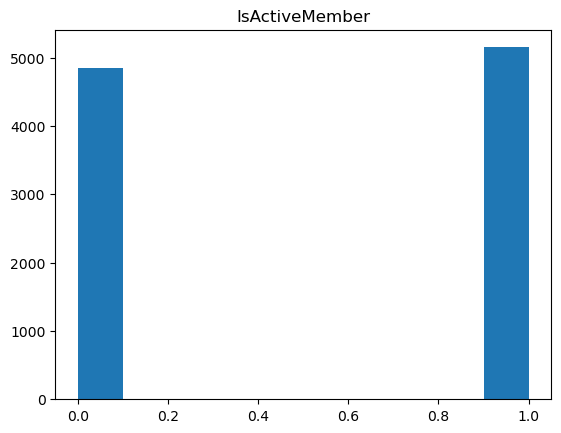

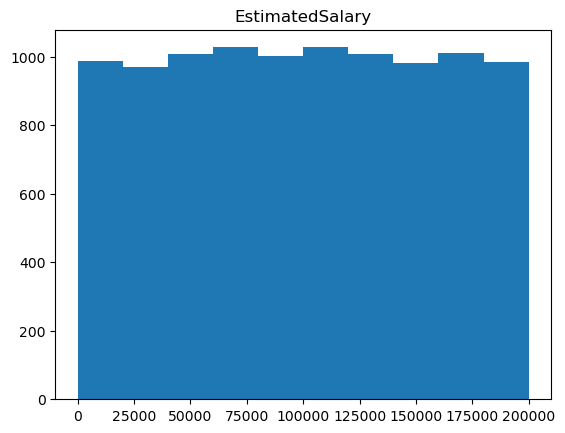

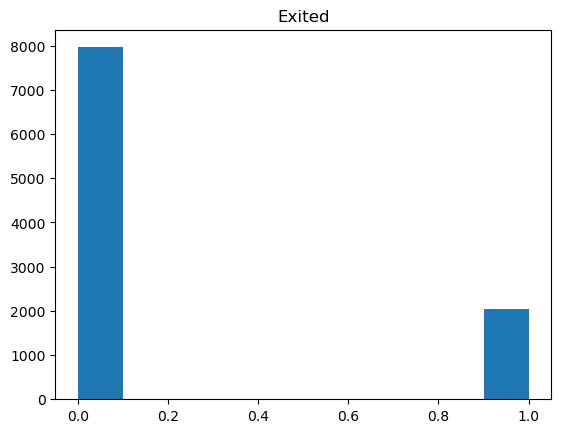

In [16]:
# Data visualizaation
for col in df_num: 
  plt.hist(df_num[col])
  plt.title(col) 
  plt.show() 

In [17]:
# data scaling
for col in df_num:
  mm = MinMaxScaler()
  df_num[col] = mm.fit_transform(df_num[[col]])

In [18]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [19]:
# Combining data
df_new = pd.concat([df_cat, df_num],axis=1)
df_new.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,2,0,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0,0,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0,0,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,2,0,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [20]:
# skewness check
for col in df_new:
  print(col)
  print(skew(df_new[col]))

Geography
0.5008407009214262
Gender
-0.18356836950562547
CreditScore
-0.07159586676212276
Age
1.011168558662808
Tenure
0.010989809189780922
Balance
-0.1410875437529113
NumOfProducts
0.7454560484389492
HasCrCard
-0.9016763178640548
IsActiveMember
-0.06042756246298516
EstimatedSalary
0.0020850448448751302
Exited
1.4713899141398699


In [21]:
df_new["NumOfProducts"] = np.sqrt(df_new["NumOfProducts"])

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

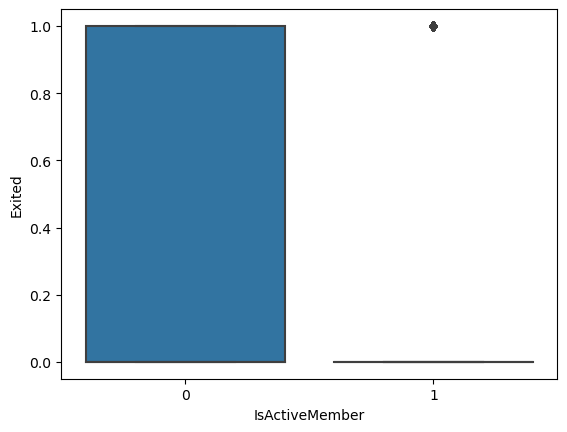

In [22]:
# outlier detection
sns.boxplot(x = 'IsActiveMember', y = 'Exited', data = df)

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

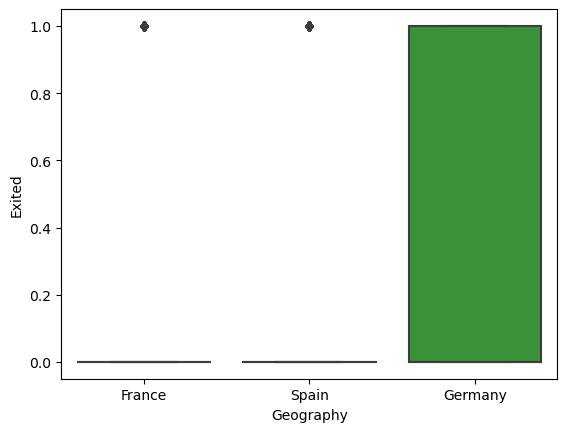

In [23]:
sns.boxplot(x = 'Geography', y = 'Exited', data = df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

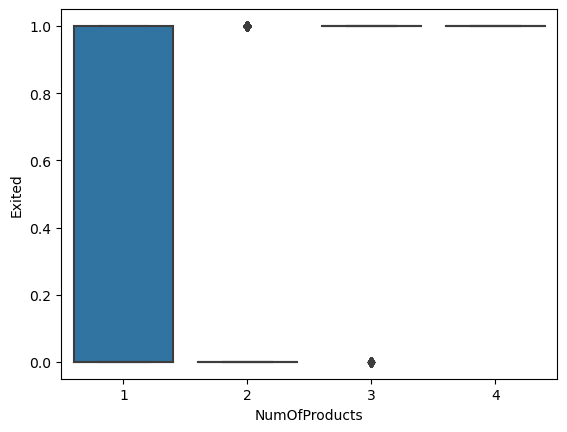

In [24]:
sns.boxplot(x = 'NumOfProducts', y = 'Exited', data = df)

In [25]:
# data splitting for train & test
X = df_new.drop(["Exited"],axis=1)
y = df_new["Exited"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [48]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [26]:
# to stop epochs as per specified parameters
early_stopping = EarlyStopping(
    
    monitor="loss",
    min_delta = 0.05,
    patience = 8
)

In [27]:
# Neural Network
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=X.shape[1]))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [28]:
# model optimizing
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

In [29]:
train_history = model.fit(X_train, y_train, epochs=20, batch_size=500, callbacks=[early_stopping])

Epoch 1/20
14/14 [==============================] - 2s 23ms/step - loss: 0.6811 - Accuracy: 0.6487
Epoch 2/20
14/14 [==============================] - 0s 21ms/step - loss: 0.5076 - Accuracy: 0.7847
Epoch 3/20
14/14 [==============================] - 0s 20ms/step - loss: 0.4366 - Accuracy: 0.8387
Epoch 4/20
14/14 [==============================] - 0s 20ms/step - loss: 0.3818 - Accuracy: 0.8614
Epoch 5/20
14/14 [==============================] - 0s 21ms/step - loss: 0.3434 - Accuracy: 0.8730
Epoch 6/20
14/14 [==============================] - 0s 21ms/step - loss: 0.3044 - Accuracy: 0.8876
Epoch 7/20
14/14 [==============================] - 0s 19ms/step - loss: 0.2882 - Accuracy: 0.8884
Epoch 8/20
14/14 [==============================] - 0s 20ms/step - loss: 0.2665 - Accuracy: 0.8969
Epoch 9/20
14/14 [==============================] - 0s 21ms/step - loss: 0.2469 - Accuracy: 0.9019
Epoch 10/20
14/14 [==============================] - 0s 21ms/step - loss: 0.2336 - Accuracy: 0.9043
Epoch 11/

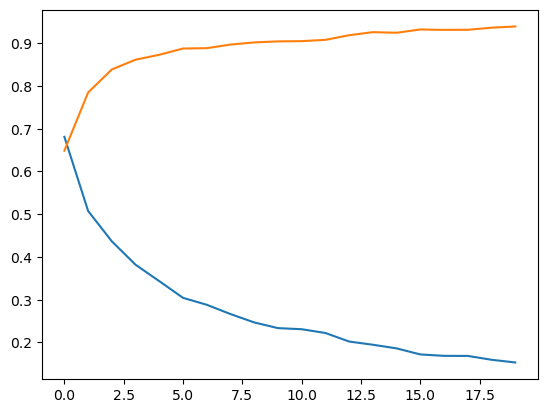

In [30]:
# loss and accuracy
plt.figure()
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['Accuracy'])
plt.show()

In [31]:
# Model evaluation
model.evaluate(X_test,y_test,batch_size=300)

10/10 [==============================] - 0s 5ms/step - loss: 0.5267 - Accuracy: 0.7793


[0.5267382264137268, 0.7793333530426025]

In [32]:
y_pred = model.predict(X_test)
y_pred

array([[0.16320655],
       [0.39578083],
       [0.07484961],
       ...,
       [0.14558461],
       [0.14033616],
       [0.26068276]], dtype=float32)

In [33]:
y_pred = np.where(y_pred >= 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.97      0.87      2373
         1.0       0.34      0.06      0.10       627

    accuracy                           0.78      3000
   macro avg       0.57      0.51      0.49      3000
weighted avg       0.70      0.78      0.71      3000



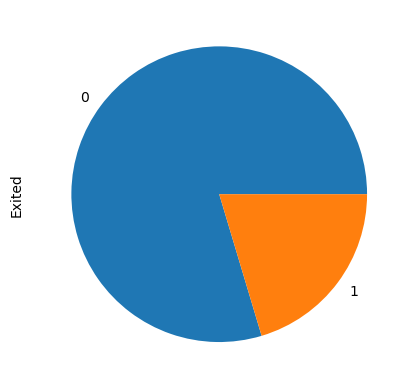

In [35]:
# output value count
df["Exited"].value_counts().plot(kind="pie")
plt.show()

In [36]:
# Random over sampling
ros = RandomOverSampler(random_state=1)
X_sample2, y_sample2 = ros.fit_resample(X_train,y_train)

In [37]:
y_sample2.value_counts()

0.0    5590
1.0    5590
Name: Exited, dtype: int64

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_sample2, y_sample2,test_size=0.3,random_state=1)

In [39]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=X_sample2.shape[1]))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [40]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

In [41]:
train_history = model.fit(X_sample2, y_sample2, epochs=20, batch_size=500, callbacks=[early_stopping])

Epoch 1/20
23/23 [==============================] - 2s 20ms/step - loss: 0.5625 - Accuracy: 0.7146
Epoch 2/20
23/23 [==============================] - 0s 19ms/step - loss: 0.4074 - Accuracy: 0.8114
Epoch 3/20
23/23 [==============================] - 0s 20ms/step - loss: 0.3464 - Accuracy: 0.8499
Epoch 4/20
23/23 [==============================] - 0s 19ms/step - loss: 0.3170 - Accuracy: 0.8638
Epoch 5/20
23/23 [==============================] - 0s 20ms/step - loss: 0.2945 - Accuracy: 0.8759
Epoch 6/20
23/23 [==============================] - 0s 20ms/step - loss: 0.2691 - Accuracy: 0.8892
Epoch 7/20
23/23 [==============================] - 0s 20ms/step - loss: 0.2489 - Accuracy: 0.8989
Epoch 8/20
23/23 [==============================] - 0s 19ms/step - loss: 0.2267 - Accuracy: 0.9072
Epoch 9/20
23/23 [==============================] - 0s 20ms/step - loss: 0.2095 - Accuracy: 0.9159
Epoch 10/20
23/23 [==============================] - 0s 20ms/step - loss: 0.2044 - Accuracy: 0.9195
Epoch 11/

In [42]:
model.evaluate(X_test,y_test,batch_size=100)

34/34 [==============================] - 0s 3ms/step - loss: 0.6479 - Accuracy: 0.7537


[0.6478949189186096, 0.7537268996238708]